## Project Objective / Problem Statement

The objective of this project is to develop a **supervised machine learning classification model** that predicts the **severity level of road accidents**  
**(1 = least severe to 4 = most severe)** based on **road, weather, and environmental factors** using **historical U.S. accident data** which consists of **7.7 million records**,  
enabling **authorities and navigation systems** to anticipate and respond to accidents more effectively.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [120]:
import warnings
warnings.filterwarnings('ignore')

In [58]:


file_path = 'US_Accidents_March23.csv'

# Load the data
df = pd.read_csv(file_path)




In [93]:
#copy of original data
new_df = df.copy()

In [91]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [74]:
total_columns = len(df.columns)
total_columns

46

In [75]:
df.shape

(7728394, 46)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

# DATA ANALYSIS - To understand the data in better way

In [62]:
city=df.City.unique()

In [63]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

# Top 20 cities by accidents

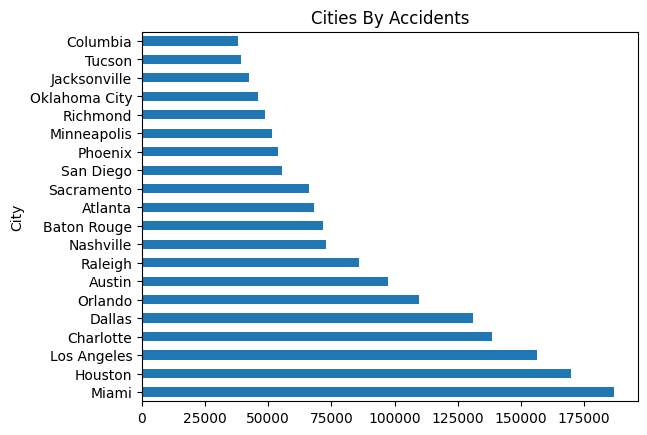

In [64]:
cities_by_accidents[:20].plot(kind='barh')
plt.title("Cities By Accidents")
plt.show()

# Temperature at Time of Accident Occurence

In [65]:
# Temperature

grouped_data = df.groupby('Temperature(F)').size().reset_index(name='accident_count')

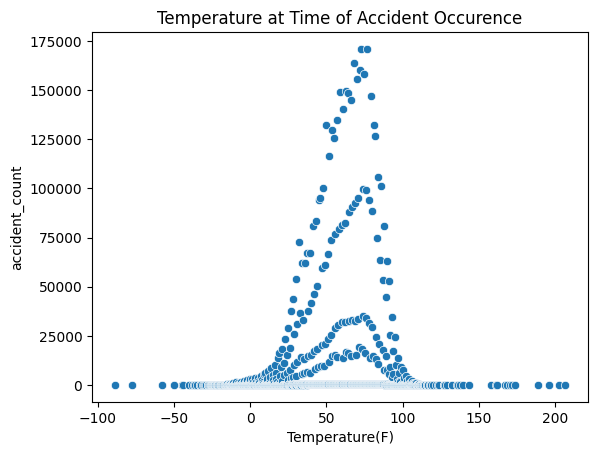

In [66]:
sns.scatterplot(data=grouped_data, x='Temperature(F)', y='accident_count')
plt.title("Temperature at Time of Accident Occurence")
plt.show()

In [67]:
# weather

weather_conditions = df.groupby(['Weather_Condition']).count()['ID']
weather_conditions

Weather_Condition
Blowing Dust                 189
Blowing Dust / Windy         266
Blowing Sand                   2
Blowing Snow                 740
Blowing Snow / Windy         925
                           ...  
Volcanic Ash                  22
Widespread Dust              181
Widespread Dust / Windy       24
Wintry Mix                 11703
Wintry Mix / Windy           331
Name: ID, Length: 144, dtype: int64

# Top 20 weather conditions at the time of accident occurence

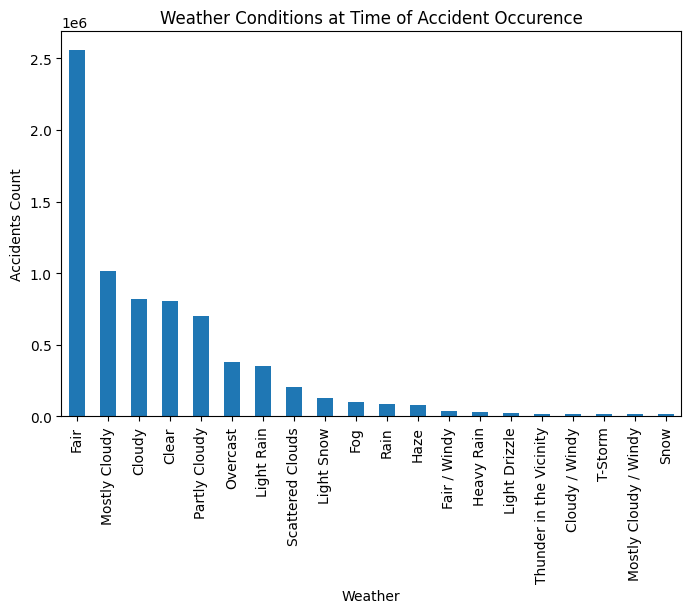

In [70]:
fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')

ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

# Latitude And Longitude of Accident Occurance

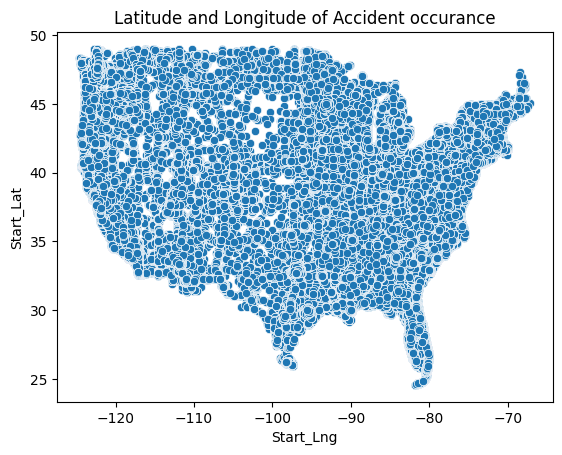

In [71]:
sns.scatterplot(df,x="Start_Lng",y="Start_Lat")
plt.title("Latitude and Longitude of Accident occurance")
plt.show()

# State Wise Accidents

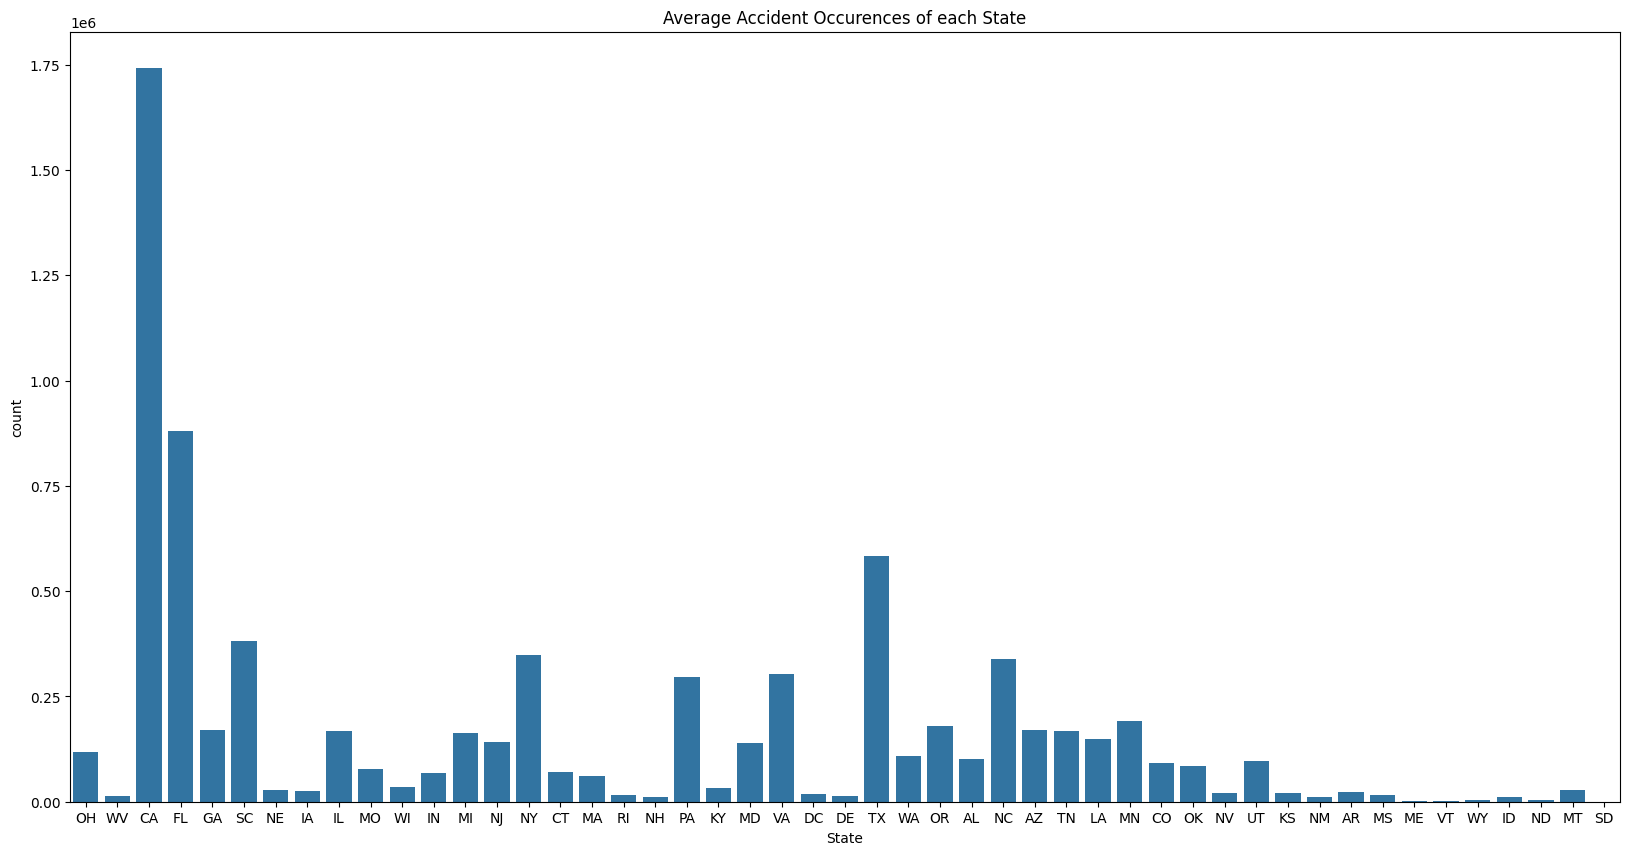

In [72]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x="State")
plt.title("Average Accident Occurences of each State")
plt.show()

# Checked Null Values

In [103]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

# Display shape, columns, head For quick data insights

In [100]:
# Fill numeric feature with mean and categorical feature with mode

numeric_cols_to_fill = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
for col in numeric_cols_to_fill:
    if col in new_df.columns:
        new_df[col].fillna(new_df[col].mean(), inplace=True)

# Fill bool feature with mode
bool_cols_to_fill = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
for col in bool_cols_to_fill:
    if col in new_df.columns:
        new_df[col].fillna(new_df[col].mode()[0], inplace=True)

In [101]:
#deleting the remaining rows containing missing values
new_df.dropna(inplace=True)
print(f"\nAfter handling some missing values, the remaining data volume is: {len(new_df)}")


After handling some missing values, the remaining data volume is: 3624394


In [104]:
# Time Feature Conversion

# Use format='mixed' to handle inconsistent date and time formats

new_df['Start_Time'] = pd.to_datetime(new_df['Start_Time'], format='mixed')
new_df['End_Time'] = pd.to_datetime(new_df['End_Time'], format='mixed')

new_df['Duration'] = (new_df['End_Time'] - new_df['Start_Time']).dt.total_seconds() / 60

In [105]:
# Delete columns containing the original time and those that are no longer needed.

new_df = new_df.drop(columns=['ID', 'Start_Time', 'End_Time', 'Description', 'City', 'County', 'State',
                      'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp'])

In [106]:
print("Shape:", new_df.shape)
display(new_df.head(10))
print("\nColumns:", new_df.columns.tolist()) # stored column names in list
print("\nInfo:")
display(new_df.info())

Shape: (3624394, 35)


,Source,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Temperature(F),Wind_Chill(F),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
3402762,Source1,3,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,42.1,36.100000,...,False,False,False,False,False,Night,Night,Night,Night,360.0
3402763,Source1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,36.9,58.251048,...,False,False,False,False,False,Night,Night,Night,Night,360.0
3402764,Source1,2,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,36.0,58.251048,...,False,False,False,False,False,Night,Night,Night,Day,360.0
3402765,Source1,2,39.101480,-84.523410,39.098410,-84.522410,0.219,US-50 E,36.0,58.251048,...,False,False,False,False,False,Night,Night,Night,Day,360.0
3402767,Source1,3,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,37.0,29.800000,...,False,False,False,False,False,Day,Day,Day,Day,360.0
3402771,Source1,2,41.375310,-81.820170,41.367860,-81.821740,0.521,I-71 S,33.1,30.000000,...,False,False,False,False,False,Day,Day,Day,Day,360.0
3402773,Source1,2,40.109310,-82.968490,40.110780,-82.984000,0.826,Outerbelt W,32.0,28.700000,...,False,False,False,False,False,Day,Day,Day,Day,360.0
3402774,Source1,2,39.192880,-84.477230,39.196150,-84.473350,0.307,I-75 N,33.8,29.600000,...,False,False,False,False,False,Day,Day,Day,Day,360.0
3402776,Source1,2,41.473900,-81.704233,41.473880,-81.705590,0.070,I-90 E,33.1,24.400000,...,False,False,False,False,False,Day,Day,Day,Day,360.0
3402777,Source1,2,39.582242,-83.677814,39.603013,-83.637319,2.590,I-71 N,33.8,28.600000,...,False,False,False,False,False,Day,Day,Day,Day,360.0



Columns: ['Source', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Street', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Duration']

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3624394 entries, 3402762 to 7728393
Data columns (total 35 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               int64  
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   End_Lat                float64
 5   End_Lng                float64
 6   Distance(mi)           float64
 7   Street                 

None

#   Check shape and the target distribution. For multiclass problems, if the target is imbalanced, we'll plan for that (class weights / resampling).

In [107]:
print("Severity value counts:")
display(new_df['Severity'].value_counts().sort_index())
print("\nNormalized distribution:")
display(new_df['Severity'].value_counts(normalize=True).sort_index())

Severity value counts:


Severity
1      25613
2    3403939
3      76382
4     118460
Name: count, dtype: int64


Normalized distribution:


Severity
1    0.007067
2    0.939175
3    0.021074
4    0.032684
Name: proportion, dtype: float64

In [108]:
severity_counts = new_df['Severity'].value_counts().sort_index()

# BAR CHART To Show Imbalance in Severity Levels

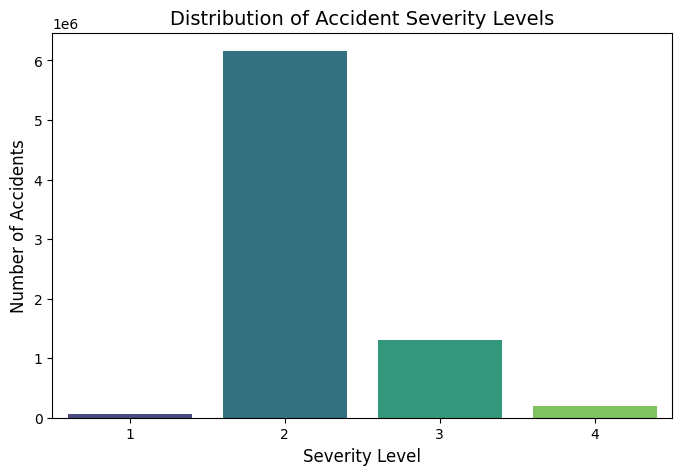

In [77]:
plt.figure(figsize=(8,5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')
plt.title("Distribution of Accident Severity Levels", fontsize=14)
plt.xlabel("Severity Level", fontsize=12)

plt.ylabel("Number of Accidents", fontsize=12)
plt.show()

In [50]:
cat_cols = df.select_dtypes(include='object').columns

In [51]:
#Cat Columns
for col in cat_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Value Counts for ID:
ID
A-1          1
A-2          1
A-3          1
A-4          1
A-5          1
            ..
A-7777757    1
A-7777758    1
A-7777759    1
A-7777760    1
A-7777761    1
Name: count, Length: 7728394, dtype: int64

Value Counts for Source:
Source
Source1    4325632
Source2    3305373
Source3      97389
Name: count, dtype: int64

Value Counts for Start_Time:
Start_Time
2021-01-26 16:16:13    225
2021-01-26 16:17:33    156
2021-02-16 06:42:43    139
2021-11-21 18:37:51    108
2020-12-16 13:53:25     96
                      ... 
2019-08-23 14:19:41      1
2019-08-23 14:56:16      1
2019-08-23 15:19:26      1
2019-08-23 15:23:31      1
2016-02-08 09:35:35      1
Name: count, Length: 6131796, dtype: int64

Value Counts for End_Time:
End_Time
2021-11-22 08:00:00    112
2017-05-15 15:22:55     73
2019-10-26 09:14:51     49
2018-11-25 02:51:02     46
2020-02-14 00:00:00     46
                      ... 
2019-08-23 15:48:29      1
2019-08-23 15:52:30      1
2019-08-23 16:03:

In [87]:
bool_cols = df.select_dtypes(include='bool').columns

In [55]:
#Bool Columns
for data in bool_cols:
    print(f"\nValue Counts for {data}:")
    print(df[data].value_counts())


Value Counts for Amenity:
Amenity
False    7632060
True       96334
Name: count, dtype: int64

Value Counts for Bump:
Bump
False    7724880
True        3514
Name: count, dtype: int64

Value Counts for Crossing:
Crossing
False    6854631
True      873763
Name: count, dtype: int64

Value Counts for Give_Way:
Give_Way
False    7691812
True       36582
Name: count, dtype: int64

Value Counts for Junction:
Junction
False    7157052
True      571342
Name: count, dtype: int64

Value Counts for No_Exit:
No_Exit
False    7708849
True       19545
Name: count, dtype: int64

Value Counts for Railway:
Railway
False    7661415
True       66979
Name: count, dtype: int64

Value Counts for Roundabout:
Roundabout
False    7728145
True         249
Name: count, dtype: int64

Value Counts for Station:
Station
False    7526493
True      201901
Name: count, dtype: int64

Value Counts for Stop:
Stop
False    7514023
True      214371
Name: count, dtype: int64

Value Counts for Traffic_Calming:
Traffic_Calming

# Exploratory Data Analysis (EDA)
Goal: understand missingness, types, basic statistics, and relationships.

# Missing values & basic stats

In [39]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing, "missing_pct": missing_percent})
display(missing_df.head(30))  # show top 30 missing columns

#display(df.describe(include='all').T

,missing_count,missing_pct
End_Lng,3402762,44.03
End_Lat,3402762,44.03
Precipitation(in),2203586,28.51
Wind_Chill(F),1999019,25.87
Wind_Speed(mph),571233,7.39
Visibility(mi),177098,2.29
Wind_Direction,175206,2.27
Humidity(%),174144,2.25
Weather_Condition,173459,2.24
Temperature(F),163853,2.12


# Visualize target vs a few numeric features

Numeric columns sample: ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)']


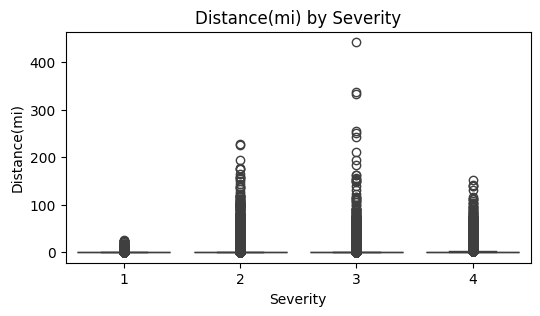

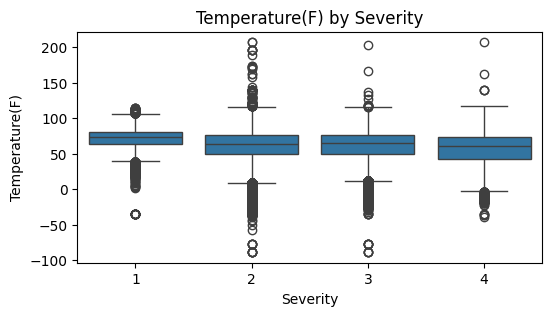

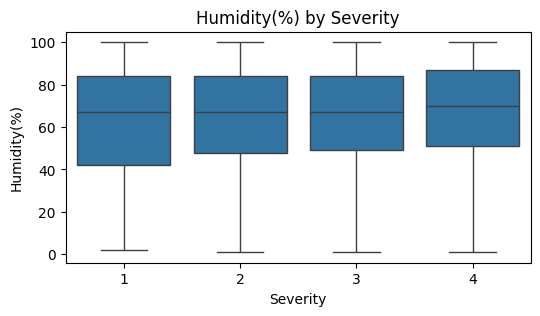

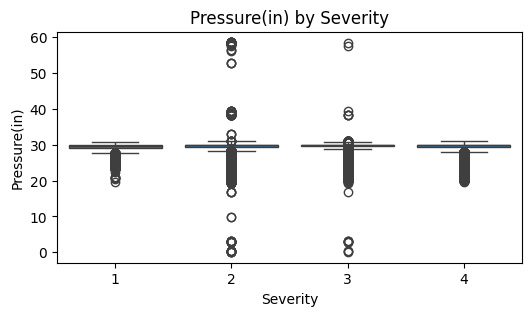

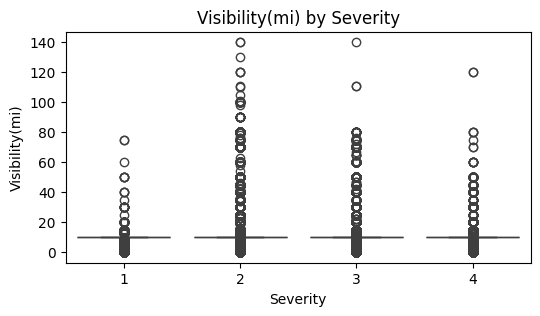

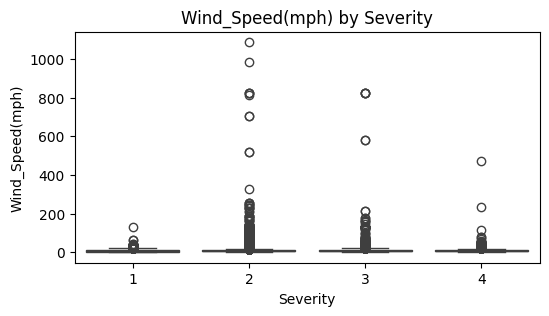

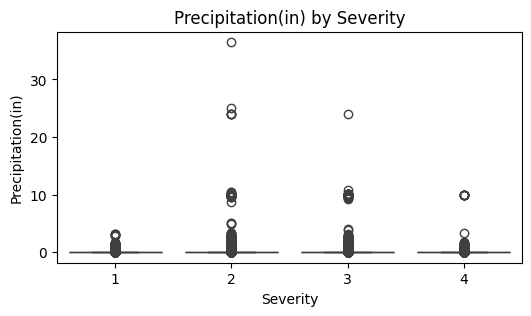

In [40]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns sample:", numeric_cols[:10])

# Choose a handful of sensible numerical columns
candidates = ["Distance(mi)", "Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
num_available = [c for c in candidates if c in df.columns]

for col in num_available:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Severity', y=col, data=df)
    plt.title(f"{col} by Severity")
    plt.show()

# Categorical overview and sample counts

In [41]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Number of categorical cols:", len(cat_cols))
display(df[cat_cols].nunique().sort_values(ascending=False).head(20))

Number of categorical cols: 20


ID                       7728394
End_Time                 6705355
Start_Time               6131796
Description              3761578
Weather_Timestamp         941331
Zipcode                   825094
Street                    336306
City                       13678
Airport_Code                2045
County                      1871
Weather_Condition            144
State                         49
Wind_Direction                24
Timezone                       4
Source                         3
Sunrise_Sunset                 2
Nautical_Twilight              2
Civil_Twilight                 2
Astronomical_Twilight          2
Country                        1
dtype: int64

In [47]:
df['Weather_Condition'].value_counts().head(50)

Weather_Condition
Fair                            2560802
Mostly Cloudy                   1016195
Cloudy                           817082
Clear                            808743
Partly Cloudy                    698972
Overcast                         382866
Light Rain                       352957
Scattered Clouds                 204829
Light Snow                       128680
Fog                               99238
Rain                              84331
Haze                              76223
Fair / Windy                      35671
Heavy Rain                        32309
Light Drizzle                     22684
Thunder in the Vicinity           17611
Cloudy / Windy                    17035
T-Storm                           16810
Mostly Cloudy / Windy             16508
Snow                              15537
Thunder                           14202
Light Rain with Thunder           13597
Smoke                             12668
Wintry Mix                        11703
Partly Cloudy / Windy 

In [110]:
new_df.head(5)

,Source,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Temperature(F),Wind_Chill(F),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
3402762,Source1,3,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,42.1,36.100000,...,False,False,False,False,False,Night,Night,Night,Night,360.0
3402763,Source1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,36.9,58.251048,...,False,False,False,False,False,Night,Night,Night,Night,360.0
3402764,Source1,2,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,36.0,58.251048,...,False,False,False,False,False,Night,Night,Night,Day,360.0
3402765,Source1,2,39.101480,-84.523410,39.098410,-84.522410,0.219,US-50 E,36.0,58.251048,...,False,False,False,False,False,Night,Night,Night,Day,360.0
3402767,Source1,3,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,37.0,29.800000,...,False,False,False,False,False,Day,Day,Day,Day,360.0


In [ ]:
# Feature Encoding for Object and Bool

The following categorical features have been encoded: []

Computing feature correlation matrix...
Plotting correlation heatmap...


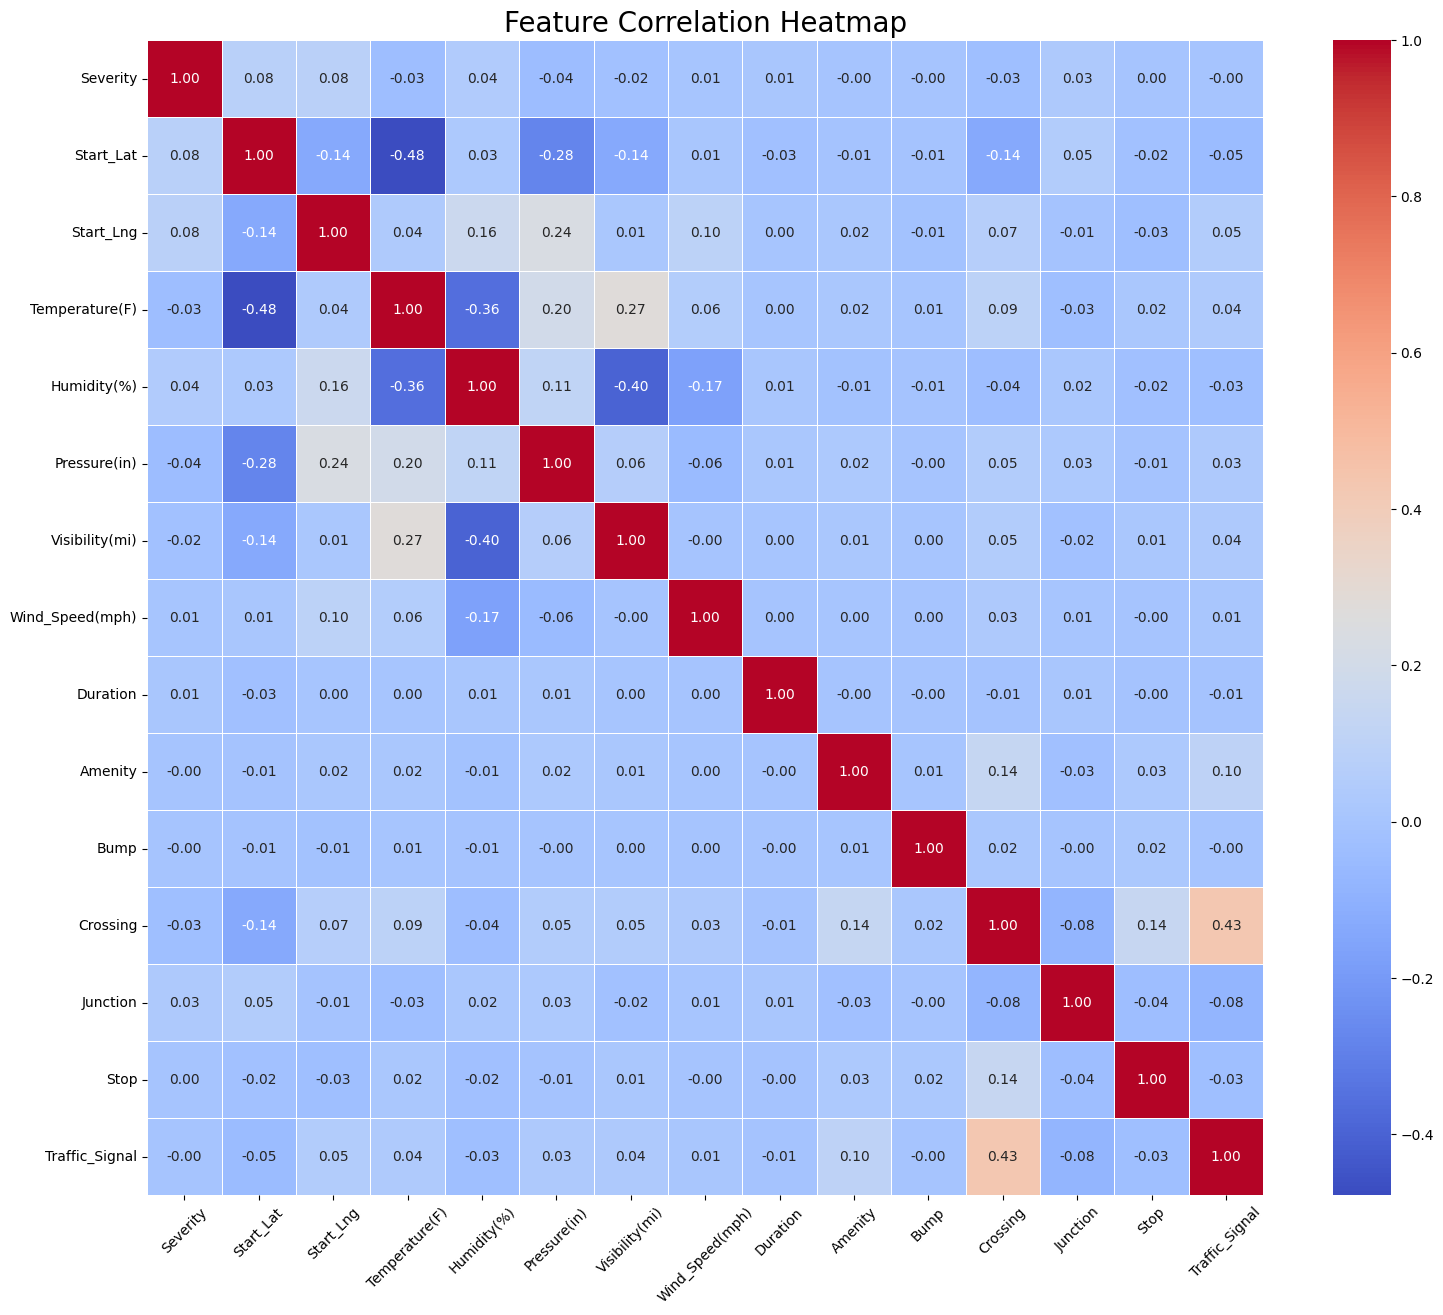


Feature selection completed.
Final number of features: 34
Feature list: ['Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Street', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Duration']


In [112]:
# 1. Feature Encoding
# Select columns of type object/bool for label encoding
categorical_cols = new_df.select_dtypes(include=['object', 'bool']).columns

# Apply LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    new_df[col] = le.fit_transform(new_df[col])

print(f"The following categorical features have been encoded: {list(categorical_cols)}")


# 2. Compute Correlation Matrix
print("\nComputing feature correlation matrix...")
# To make the visualization clearer, select a subset of numerical features and encoded categorical ones
# Select features that are likely correlated with 'Severity'
selected_features = [
    'Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Duration', 'Hour', 'Weekday',
    'Amenity', 'Bump', 'Crossing', 'Junction', 'Stop', 'Traffic_Signal'
]

# Ensure all selected features exist in the DataFrame
selected_features = [f for f in selected_features if f in new_df.columns]

corr_matrix = new_df[selected_features].corr()


# 3. Plot Heatmap
print("Plotting correlation heatmap...")
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('feature_correlation_heatmap.png')
plt.show()


# 4. Feature Selection
# From the heatmap, we can observe that 'Severity' does not have strong correlation 
# with individual features, suggesting that a combination of features may be required 
# to predict severity effectively.

# Define features (X) and target (y)
X = new_df.drop('Severity', axis=1)
y = new_df['Severity']

# Ensure all columns are numeric
# (After encoding above, this should be fine, but let's double-check)
non_numeric_cols = X.select_dtypes(include=['object', 'bool']).columns
if len(non_numeric_cols) > 0:
    print(f"Warning: Non-numeric features found: {list(non_numeric_cols)}. Please check the encoding process.")
    # Encode again or remove them
    for col in non_numeric_cols:
        X[col] = LabelEncoder().fit_transform(X[col])

print("\nFeature selection completed.")
print(f"Final number of features: {X.shape[1]}")
print(f"Feature list: {X.columns.tolist()}")

# Save features and target for the next stage (modeling)
X.to_csv('features.csv', index=False)
y.to_csv('target.csv', index=False)


In [4]:


# ============================================
# Load Feature and Target Tables
# ============================================
# Load your data files
X = pd.read_csv("features.csv")      # Independent features
y = pd.read_csv("target.csv")      # Target (Severity)

# Convert target DataFrame to Series (required for sklearn)
y = y.squeeze()

print(" Features shape:", X.shape)
print(" Target shape:", y.shape)

# ============================================
#  Encode Categorical Columns
# ============================================
# Convert categorical columns to numeric using one-hot encoding
#X = pd.get_dummies(X, drop_first=True)

# ============================================
# Train-Test Split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================
# Apply SMOTE for Class Imbalance
# ============================================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

# ============================================
# Define Models
# ============================================
models = {
#    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
     "Decision Tree": DecisionTreeClassifier(random_state=42),
#    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# ============================================
#  Train, Predict & Report for Each Model
# ============================================
scaler = StandardScaler()

for name, model in models.items():
    print("=" * 70)
    print(f" Training Model: {name}")
    print("=" * 70)
    
    # Create a pipeline: scaling + model
    pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', model)
    ])
    0
    # Train the model
    pipe.fit(X_train_res, y_train_res)
    
    # Predict on test data
    y_pred = pipe.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    report = classification_report(y_test, y_pred)
    
    # Display results
    print(f" Accuracy Score: {acc:.4f}")
    print(f" Macro F1-Score: {f1:.4f}")
    print("\n Classification Report:")
    print(report)


 Features shape: (3624394, 34)
 Target shape: (3624394,)
Before SMOTE: {2: 2723151, 4: 94768, 3: 61106, 1: 20490}
After SMOTE: {2: 2723151, 4: 2723151, 3: 2723151, 1: 2723151}
🔹 Training Model: Decision Tree
 Accuracy: 0.8890
 Macro F1-Score: 0.5411

 Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.75      0.57      5123
           2       0.97      0.92      0.94    680788
           3       0.34      0.62      0.44     15276
           4       0.16      0.32      0.22     23692

    accuracy                           0.89    724879
   macro avg       0.48      0.65      0.54    724879
weighted avg       0.93      0.89      0.91    724879



In [5]:
# Load your data files
X = pd.read_csv("features.csv")      # Independent features
y = pd.read_csv("target.csv")      # Target (Severity)

# Convert target DataFrame to Series (required for sklearn)
y = y.squeeze()

print(" Features shape:", X.shape)
print(" Target shape:", y.shape)

# ============================================
#  Encode Categorical Columns
# ============================================
# Convert categorical columns to numeric using one-hot encoding
#X = pd.get_dummies(X, drop_first=True)

# ============================================
# Train-Test Split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================
# Apply SMOTE for Class Imbalance
# ============================================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

# ============================================
# Define Models
# ============================================
models = {
#    "Logistic Regression": LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier( max_depth=20,                # limit tree depth
    min_samples_split=200,       # node needs at least 200 samples to split
    min_samples_leaf=50,         # each leaf must have at least 50 samples
    criterion='gini',            
    random_state=42,),
     
    "Random Forest": RandomForestClassifier( n_estimators=200,          # more trees improves stability
    max_depth=25,             # prevent huge trees
    min_samples_split=200,    # avoid splitting noise
    min_samples_leaf=50,      # strong regularization
    max_features='sqrt',      # faster split decisions
    n_jobs=-1,                # use all CPU cores
#   class_weight='balanced',  # handle imbalance
    random_state=42),


}

# ============================================
#  Train, Predict & Report for Each Model
# ============================================
scaler = StandardScaler()

for name, model in models.items():
    print("=" * 70)
    print(f" Training Model: {name}")
    print("=" * 70)
    
    # Create a pipeline: scaling + model
    pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', model)
    ])
    0
    # Train the model
    pipe.fit(X_train_res, y_train_res)
    
    # Predict on test data
    y_pred = pipe.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    report = classification_report(y_test, y_pred)
    
    # Display results
    print(f" Accuracy Score: {acc:.4f}")
    print(f" Macro F1-Score: {f1:.4f}")
    print("\n Classification Report:")
    print(report)


 Features shape: (3624394, 34)
 Target shape: (3624394,)
Before SMOTE: {2: 2723151, 4: 94768, 3: 61106, 1: 20490}
After SMOTE: {2: 2723151, 4: 2723151, 3: 2723151, 1: 2723151}
🔹 Training Model: Decision Tree
 Accuracy Score: 0.8180
 Macro F1-Score: 0.4819

 Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.89      0.42      5123
           2       0.99      0.83      0.90    680788
           3       0.24      0.77      0.37     15276
           4       0.15      0.55      0.23     23692

    accuracy                           0.82    724879
   macro avg       0.41      0.76      0.48    724879
weighted avg       0.94      0.82      0.86    724879

🔹 Training Model: Random Forest
 Accuracy Score: 0.8356
 Macro F1-Score: 0.4992

 Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.92      0.44      5123
           2       0.98      0.85      0.91    680788
           3    

## Confusion Matrix of Random Forest

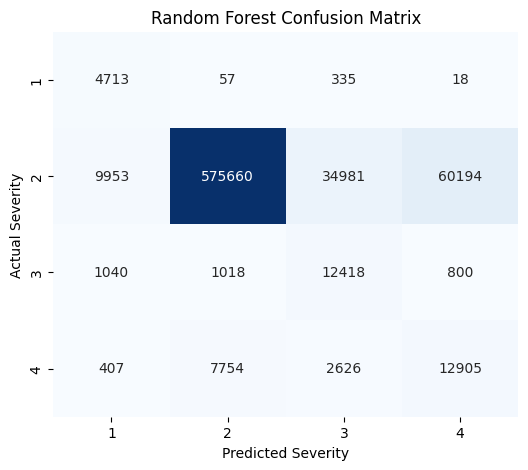

In [9]:
 # Plot confusion matrix as heatmap for Random Forest Alogorithm
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Severity")
plt.ylabel("Actual Severity")
plt.show()

## Conclusion

1. The Random Forest model achieved the best performance among tested algorithms (Accuracy Score ≈ 83.6%, Macro F1 ≈ 0.50).

2. The class imbalance heavily influenced model predictions — moderate accidents dominate, while severe accidents are under-predicted.

3. The confusion matrix confirms that the model tends to confuse high-severity accidents with moderate ones.

4. The project demonstrates that machine learning can effectively predict accident severity using public data, but further refinement is needed for critical cases.